In [439]:
from config import *
from models import *

model = SceneLearner(config)

In [440]:
from datasets import *
B = 1
shuffle = 1
dataset = StructureGroundingDataset(config, category="vase", split = "train")
dataloader = DataLoader(dataset, batch_size = B, shuffle = shuffle)

# [Get A Sample Data]
for sample in dataloader:
    sample, gt = sample

In [441]:
def visualize_pointcloud(input_pcs,name="pc"):
    rang = 0.618; N = len(input_pcs)
    num_rows = 3
    fig = plt.figure("visualize",figsize=plt.figaspect(1/N), frameon = True)
    for i in range(N):
        ax = fig.add_subplot(1, N , 1 + i, projection='3d')
        ax.set_zlim(-rang,rang);ax.set_xlim(-rang,rang);ax.set_ylim(-rang,rang)
        # make the panes transparent
        for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
            axis.set_ticklabels([])
            axis._axinfo['axisline']['linewidth'] = 1
            axis._axinfo['axisline']['color'] = (0, 0, 0)
            axis._axinfo['grid']['linewidth'] = 0.5
            axis._axinfo['grid']['linestyle'] = "-"
            axis._axinfo["grid"]['color'] =  (1,1,1,0)
            axis._axinfo['tick']['inward_factor'] = 0.0
            axis._axinfo['tick']['outward_factor'] = 0.0
            axis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.set_axis_off()
        #ax.view_init(elev = -80, azim = -90)
        coords = input_pcs[i][0]
        colors = input_pcs[i][1]
        ax.scatter(coords[:,0],coords[:,1],coords[:,2], c = colors)
    plt.savefig("outputs/{}.png".format(name))

def vis_pts_att(pts, label_map, fn="outputs/pc_mask.png", marker=".", alpha=0.9):
    # pts (n, d): numpy, d-dim point cloud
    # label_map (n, ): numpy or None
    # fn: filename of visualization
    assert pts.shape[1] in [2, 3]
    if pts.shape[1] == 2:
        xs = pts[:, 0]
        ys = pts[:, 1]
        if label_map is not None:
            plt.scatter(xs, ys, c=label_map, cmap="jet", marker=".", alpha=0.9, edgecolor="none")
        else:
            plt.scatter(xs, ys, c="grey", alpha=0.8, edgecolor="none")
        # save
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.axis("off")
    elif pts.shape[1] == 3:
        TH = 0.7
        fig_masks = plt.figure("part visualization")
        ax_masks = fig_masks.add_subplot(111, projection="3d")
        ax_masks.set_zlim(-TH,TH)
        ax_masks.set_xlim(-TH,TH)
        ax_masks.set_ylim(-TH,TH)
        xs = pts[:, 0]
        ys = pts[:, 1]
        zs = pts[:, 2]
        if label_map is not None:
            ax_masks.scatter(xs, ys, zs, c=label_map, cmap="jet", marker=marker, alpha=alpha)
        else:
            ax_masks.scatter(xs, ys, zs, marker=marker, alpha=alpha, edgecolor="none")
        ax_masks.view_init(elev = 100, azim = -120)
        ax_masks.set_xticklabels([])
        ax_masks.set_yticklabels([])
        ax_masks.set_zticklabels([])


        for axis in [ax_masks.xaxis, ax_masks.yaxis, ax_masks.zaxis]:
            axis.set_ticklabels([])
            axis._axinfo['axisline']['linewidth'] = 1
            axis._axinfo['axisline']['color'] = (0, 0, 0)
            axis._axinfo['grid']['linewidth'] = 0.5
            axis._axinfo['grid']['linestyle'] = "-"
            axis._axinfo["grid"]['color'] =  (1,1,1,0)
            axis._axinfo['tick']['inward_factor'] = 0.0
            axis._axinfo['tick']['outward_factor'] = 0.0
            axis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax_masks.set_axis_off()

    plt.savefig(
        fn,
        bbox_inches='tight',
        pad_inches=0,
        dpi=300,)

def vis_pts(x, att=None, vis_fn="outputs/temp.png"):
    idx = 0

    pts = x[idx].transpose(1, 0).cpu().numpy()
    label_map = None
    if att is not None:
        label_map = torch.argmax(att, dim=2)[idx].squeeze().cpu().numpy()
    vis_pts_att(pts, label_map, fn=vis_fn)


In [442]:
def visualize_pointcloud_components(pts):
    namo_colors = [
    '#1f77b4',  # muted blue
    '#005073',  # safety orange
    '#96aab3',  # cooked asparagus green
    '#2e3e45',  # brick red
    '#08455e',  # muted purple
    '#575959',  # chestnut brown
    '#38677a',  # raspberry yogurt pink
    '#187b96',  # middle gray
    '#31393b',  # curry yellow-green
    '#1cd1ed'   # blue-teal
    ]
    all_pts = pts.reshape([-1,3])
    N = pts.shape[0]
    rang = 0.7
    s = 3.0
    fig = plt.figure("visualize",figsize=(s * N//2,s * 2), frameon = True)
    full_fig = plt.figure("full_viz", figsize = (s,s), frameon = False)
    full_rows = 2
    full_cols = N // 2 
    full_ax = full_fig.add_subplot(1,1,1,projection='3d')
    full_ax.set_axis_off()
    full_ax.set_zlim(-rang,rang);full_ax.set_xlim(-rang,rang);full_ax.set_ylim(-rang,rang)
    for i in range(N):
        row = i // full_cols
 
        ax = fig.add_subplot(2, full_cols , 1 + i  , projection='3d')
        ax.set_zlim(-rang,rang);ax.set_xlim(-rang,rang);ax.set_ylim(-rang,rang)
        # make the panes transparent
        for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
            axis.set_ticklabels([])
            axis._axinfo['axisline']['linewidth'] = 1
            axis._axinfo['axisline']['color'] = (0, 0, 0)
            #axis._axinfo['grid']['linewidth'] = 0.5
            #axis._axinfo['grid']['linestyle'] = "-"
            axis._axinfo["grid"]['color'] =  (1,1,1,0)
            axis._axinfo['tick']['inward_factor'] = 0.0
            axis._axinfo['tick']['outward_factor'] = 0.0
            axis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.set_axis_off()
        #ax.view_init(elev = -80, azim = -90)
        for j in range(N):
            coords = pts[j]
            colors = namo_colors[j]
            alpha = 1.0 if i == j else 0.05
            ax.scatter(coords[:,0],coords[:,1],coords[:,2], c = colors, alpha = alpha)
        coords = pts[i]
        colors = namo_colors[i]
        full_ax.scatter(coords[:,0],coords[:,1],coords[:,2], c = colors)
    fig.savefig("outputs/pc_components.png")
    full_fig.savefig("outputs/pc_full_components.png")
#visualize_pointcloud_components(components[0])

In [443]:
import matplotlib.pyplot as plt
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = torch.load("checkpoints/scenelearner/3dpc/VNL_3d_perception_structure_csqnet_phase0.ckpt",map_location=device)
outputs = model.part_perception(sample)
for k in outputs:print(k)
components = outputs["components"]


# Save Test Run Results
recon_pc = outputs["recon_pc"][0]
point_cloud = sample["point_cloud"][0]
masks = outputs["masks"][0]
np.save("outputs/recon_point_cloud.npy",np.array(recon_pc.cpu().detach()))

np.save("outputs/point_cloud.npy",np.array(point_cloud.cpu().detach()))
np.save("outputs/masks.npy",np.array(masks.cpu().detach()))
if components is not None:
    np.save("outputs/splits.npy",np.array(components.cpu().detach()))
#


loss
recon_pc
masks
abstract_scene
features
positions
components


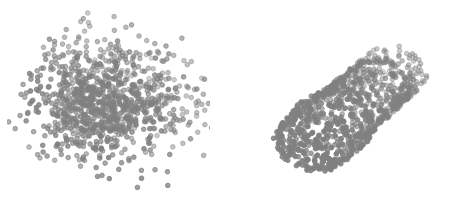

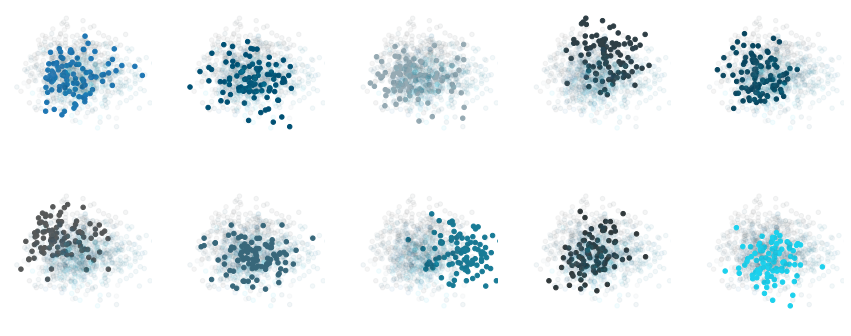

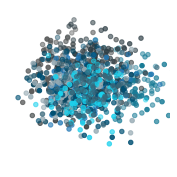

In [444]:
coords = torch.tensor(np.load("outputs/recon_point_cloud.npy")).permute(1,0)
n = coords.shape[0]
coords_colors = torch.ones([n,3]) * 0.5

pc = torch.tensor(np.load("outputs/point_cloud.npy"))
pc_colors = torch.ones(pc.shape[0],3) * 0.5

input_pcs = [(coords,coords_colors),(pc,pc_colors)]
visualize_pointcloud(input_pcs)
plt.show()


splits = np.load("outputs/splits.npy")[0]
# Visualize Components
visualize_pointcloud_components(splits)